### Testing fcsparser

|Keyword|Description|
|---|---|
|$BEGINANALYSIS|Byte-offset to the beginning of the ANALYSIS segment.|
|$BEGINDATA|Byte-offset to the beginning of the DATA segment.|
|$BEGINSTEXT|Byte-offset to the beginning of a supplemental TEXT segment.|
|$BYTEORD|Byte order for data acquisition computer.|
|$DATATYPE|Type of data in DATA segment (ASCII, integer, floating point).|
|$ENDANALYSIS|Byte-offset to the last byte of the ANALYSIS segment.|
|$ENDDATA|Byte-offset to the last byte of the DATA segment.|
|$ENDSTEXT|Byte-offset to the last byte of a supplemental TEXT segment.|
|$MODE|Data mode (list mode - preferred, histogram - deprecated).|
|$NEXTDATA|Byte offset to next data set in the file.|
|$PAR|Number of parameters in an event.|
|$PnB|Number of bits reserved for parameter number n.|
|$PnE|Amplification type for parameter n.|
|$PnN|Short name for parameter n.|
|$PnR|Range for parameter number n.|
|$TOT|Total number of events in the data set.|

From: https://en.wikipedia.org/wiki/Flow_Cytometry_Standard

In [1]:
from fcsparser.api import FCSParser
import os

BASE_DIR = os.getcwd()

In [2]:
parser = FCSParser(
    os.path.join(BASE_DIR, "data", "HTS_BD_LSR_II_Mixed_Specimen_001_D6_D06.fcs")
)

In [3]:
parser.reformat_meta()
meta = parser.annotation

In [4]:
meta

{'__header__': {'FCS format': b'FCS3.0',
  'text start': 256,
  'text end': 2359,
  'data start': 2365,
  'data end': 659944,
  'analysis start': 0,
  'analysis end': 0},
 '$BEGINANALYSIS': '0',
 '$ENDANALYSIS': '0',
 '$BEGINSTEXT': '0',
 '$ENDSTEXT': '0',
 '$BEGINDATA': '2365',
 '$ENDDATA': '659944             ',
 '$FIL': 'Specimen_001_D6_D06.fcs',
 '$SYS': 'Windows XP 5.1',
 '$TOT': 14945,
 '$PAR': 11,
 '$MODE': 'L',
 '$BYTEORD': '4,3,2,1',
 '$DATATYPE': 'F',
 '$NEXTDATA': 0,
 'CREATOR': 'BD FACSDiva Software Version 6.2',
 'TUBE NAME': 'D6',
 '$SRC': 'Specimen_001',
 'EXPERIMENT NAME': 'Eugene Yurtsev 2012-10-26 HTS-II',
 'GUID': 'ad63aa7b-1535-4d1a-8619-4ecdbdb32f00',
 '$DATE': '26-OCT-2012',
 '$BTIM': '18:08:10',
 '$ETIM': '18:08:21',
 '$CYT': 'LSRII',
 'CYTNUM': '1',
 'WINDOW EXTENSION': '10.00',
 'EXPORT USER NAME': 'EUGENEYURTSEVGORE',
 'EXPORT TIME': '26-OCT-2012-19:49:38',
 '$OP': 'EUGENEYURTSEVGORE',
 'FSC ASF': '0.83',
 'AUTOBS': 'TRUE',
 '$INST': 'GORE',
 'LASER1NAME': 'Bl

In [5]:
parser.dataframe

,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,FITC-A,PerCP-Cy5-5-A,AmCyan-A,PE-TxRed YG-A,Time
0,-28531.250000,10.0,0.0,700.149963,1656.0,27708.351562,98.799995,54.149998,164.220001,120.360001,0.200000
1,-49414.878906,8.0,0.0,1275.849976,2278.0,36705.050781,155.800003,13.300000,161.840012,94.860001,0.400000
2,-58684.320312,14.0,0.0,-512.049988,472.0,0.000000,22.799999,8.550000,172.550003,85.680000,0.500000
3,-3857.839844,432.0,0.0,276.449982,1339.0,13530.564453,-49.399998,34.200001,157.080002,89.759995,0.700000
4,22825.830078,4606.0,262143.0,-505.399994,472.0,0.000000,90.250000,9.500000,330.820007,76.500000,0.700000
...,...,...,...,...,...,...,...,...,...,...,...
14940,-28177.669922,4.0,0.0,1650.150024,1551.0,69725.484375,157.699997,398.049988,1391.110107,2730.540039,1002.700012
14941,-19354.769531,7.0,0.0,1086.799927,1073.0,66378.867188,56.049999,-12.349999,-15.470001,-14.280000,1002.700012
14942,12428.419922,2658.0,262143.0,496.850006,496.0,65648.312500,-24.699999,-9.500000,10.710001,-7.140000,1002.700012
14943,21995.000000,4392.0,262143.0,558.599976,514.0,71222.585938,67.449997,-12.349999,14.280001,-5.100000,1002.700012


In [6]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np
from matplotlib.colors import LogNorm

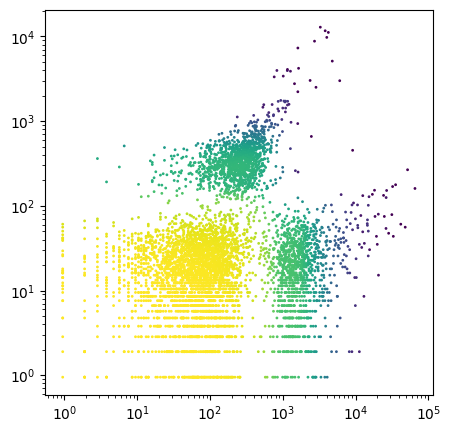

In [7]:
data_x = parser.dataframe["FITC-A"]
data_y = parser.dataframe["PerCP-Cy5-5-A"]

fig, ax = plt.subplots(figsize=(5, 5))
# plt.axis("off")

xy = np.vstack([data_x, data_y])
kernel = gaussian_kde(xy, bw_method="scott")
z = kernel(xy)

ax.scatter(
    x=data_x, y=data_y, s=1, c=z, cmap="viridis", norm=LogNorm(vmin=min(z), vmax=max(z))
)
ax.set_xscale("log")
ax.set_yscale("log")

# fig.savefig("./scatter_example.png")

FCS Parser API: https://github.com/eyurtsev/fcsparser/blob/master/fcsparser/api.py

FCS 3.1 Filestandard: https://pmc.ncbi.nlm.nih.gov/articles/PMC2892967/

In [8]:
from typing import Literal


class FCSHeader:
    def __init__(
        self,
        file_format: Literal["FCS 2.0", "FCS3.0", "FCS3.1"],
        text_start: int,
        text_end: int,
        data_start: int,
        data_end: int,
        analysis_start: int = 0,
        analysis_end: int = 0,
    ):
        self.file_format: str = file_format
        self.text_start: int = text_start
        self.text_end: int = text_end
        self.data_start: int = data_start
        self.data_end: int = data_end
        self.analysis_start: int = analysis_start
        self.analysis_end: int = analysis_end


In [9]:
meta

{'__header__': {'FCS format': b'FCS3.0',
  'text start': 256,
  'text end': 2359,
  'data start': 2365,
  'data end': 659944,
  'analysis start': 0,
  'analysis end': 0},
 '$BEGINANALYSIS': '0',
 '$ENDANALYSIS': '0',
 '$BEGINSTEXT': '0',
 '$ENDSTEXT': '0',
 '$BEGINDATA': '2365',
 '$ENDDATA': '659944             ',
 '$FIL': 'Specimen_001_D6_D06.fcs',
 '$SYS': 'Windows XP 5.1',
 '$TOT': 14945,
 '$PAR': 11,
 '$MODE': 'L',
 '$BYTEORD': '4,3,2,1',
 '$DATATYPE': 'F',
 '$NEXTDATA': 0,
 'CREATOR': 'BD FACSDiva Software Version 6.2',
 'TUBE NAME': 'D6',
 '$SRC': 'Specimen_001',
 'EXPERIMENT NAME': 'Eugene Yurtsev 2012-10-26 HTS-II',
 'GUID': 'ad63aa7b-1535-4d1a-8619-4ecdbdb32f00',
 '$DATE': '26-OCT-2012',
 '$BTIM': '18:08:10',
 '$ETIM': '18:08:21',
 '$CYT': 'LSRII',
 'CYTNUM': '1',
 'WINDOW EXTENSION': '10.00',
 'EXPORT USER NAME': 'EUGENEYURTSEVGORE',
 'EXPORT TIME': '26-OCT-2012-19:49:38',
 '$OP': 'EUGENEYURTSEVGORE',
 'FSC ASF': '0.83',
 'AUTOBS': 'TRUE',
 '$INST': 'GORE',
 'LASER1NAME': 'Bl

In [10]:
meta["_channels_"]

,$PnN,$PnR,$PnB,$PnE,$PnV,$PnG,$PnS
Channel Number,,,,,,,
1,FSC-A,262144,32,"[0, 0]",611,1.0,FSC-A
2,FSC-H,262144,32,"[0, 0]",611,1.0,FSC-H
3,FSC-W,262144,32,"[0, 0]",611,1.0,FSC-W
4,SSC-A,262144,32,"[0, 0]",210,1.0,SSC-A
5,SSC-H,262144,32,"[0, 0]",210,1.0,SSC-H
6,SSC-W,262144,32,"[0, 0]",210,1.0,SSC-W
7,FITC-A,262144,32,"[0, 0]",580,1.0,FITC-A
8,PerCP-Cy5-5-A,262144,32,"[0, 0]",580,1.0,PerCP-Cy5-5-A
9,AmCyan-A,262144,32,"[0, 0]",550,1.0,AmCyan-A


### Load CITESeq data with scanpy

In [11]:
import scanpy as sc
import pandas as pd

In [12]:
adata = sc.read_10x_h5(
    filename=os.path.join(
        BASE_DIR, "data", "5k_pbmc_protein_v3_nextgem_filtered_feature_bc_matrix.h5"
    ),
    gex_only=False,
)
adata.var_names_make_unique()

/home/malte/Dokumente/Github/citeseq_to_fcs/venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [13]:
# Filter for Citeseq data
adata_citeseq = adata[:, adata.var["feature_types"] == "Antibody Capture"]

### Generate FCS data table

In [14]:
gen_data = pd.DataFrame(adata_citeseq.X.toarray())
gen_data.columns = pd.Series(adata_citeseq.var.index)

In [15]:
# Add column for barcode
gen_data["barcode_rank"] = pd.Series(range(len(gen_data)))

In [16]:
# Add column for sum/mean reads
gen_data["total_reads"] = pd.DataFrame(adata_citeseq.X.sum(axis=1))
gen_data["mean_reads"] = pd.DataFrame(adata_citeseq.X.mean(axis=1))

In [17]:
gen_data.head()

,CD3_TotalSeqB,CD4_TotalSeqB,CD8a_TotalSeqB,CD11b_TotalSeqB,CD14_TotalSeqB,CD15_TotalSeqB,CD16_TotalSeqB,CD19_TotalSeqB,CD20_TotalSeqB,CD25_TotalSeqB,...,CD335_TotalSeqB,PD-1_TotalSeqB,HLA-DR_TotalSeqB,TIGIT_TotalSeqB,IgG1_control_TotalSeqB,IgG2a_control_TotalSeqB,IgG2b_control_TotalSeqB,barcode_rank,total_reads,mean_reads
0,12.0,280.0,9.0,3122.0,746.0,9.0,1.0,5.0,2.0,4.0,...,8.0,4.0,101.0,4.0,5.0,2.0,4.0,0,4761.0,148.78125
1,24.0,231.0,11.0,1241.0,355.0,10.0,2.0,4.0,11.0,5.0,...,8.0,8.0,1450.0,5.0,0.0,1.0,1.0,1,4010.0,125.31250
2,23.0,117.0,3.0,582.0,133.0,7.0,4.0,1.0,7.0,3.0,...,2.0,2.0,524.0,2.0,1.0,4.0,2.0,2,1824.0,57.00000
3,8.0,83.0,1.0,1966.0,675.0,7.0,2.0,3.0,8.0,3.0,...,2.0,5.0,216.0,0.0,5.0,1.0,3.0,3,3144.0,98.25000
4,726.0,1100.0,5.0,14.0,13.0,6.0,2.0,7.0,6.0,11.0,...,4.0,5.0,9.0,5.0,1.0,3.0,4.0,4,3118.0,97.43750


### Generate FCS metadata

In [18]:
class FCSGenerator:
    def __init__(self):
        self._encoding: str = "utf-8"
        self._data: pd.DataFrame = None
        self._channel_naming = "$PnS"
        self._channel_names_s = []
        self._channel_names_n = []

        # Attributes parsed from fcs file
        self._data_start = -1
        self._data_end = -1
        self.channel_numbers = []
        self._analysis = None
        self._file_size = 0

        self.annotation = {}
        self.path = None

    def _validate(self):
        if self._channel_naming not in ("$PnN", "$PnS"):
            raise ValueError('channel_naming must be either "$PnN" or "$PnS"')